In [1]:
import os
# os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION']='.9'
import jax
import jax.numpy as jnp
from jax import random,  vmap, jit
from jax.config import config
from jax import lax
from jax.flatten_util import ravel_pytree

import itertools
from functools import partial
from tqdm.auto import trange, tqdm
import time

from scipy.interpolate import griddata
from scipy.sparse import csr_matrix

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
# plt.rcParams.update({'font.size': 5})

from jax.config import config
# config.update("jax_enable_x64", True)

In [2]:
initial_mean=jnp.array([[0,0,0]])

In [3]:
from ks_solver_EK import TDKS
from aux import gen_initX,FDM_KS

rngseed=12345
rng_key=random.PRNGKey(rngseed)
ModelM0=80
pos=jnp.array([[0,0,0]])
iniX=gen_initX(rng_key,J=10000,r=1,pos=pos,plot=False)
T=2e-2
dt=1e-4
eps=1e-4

--- Build time 0.6705031394958496 s ---


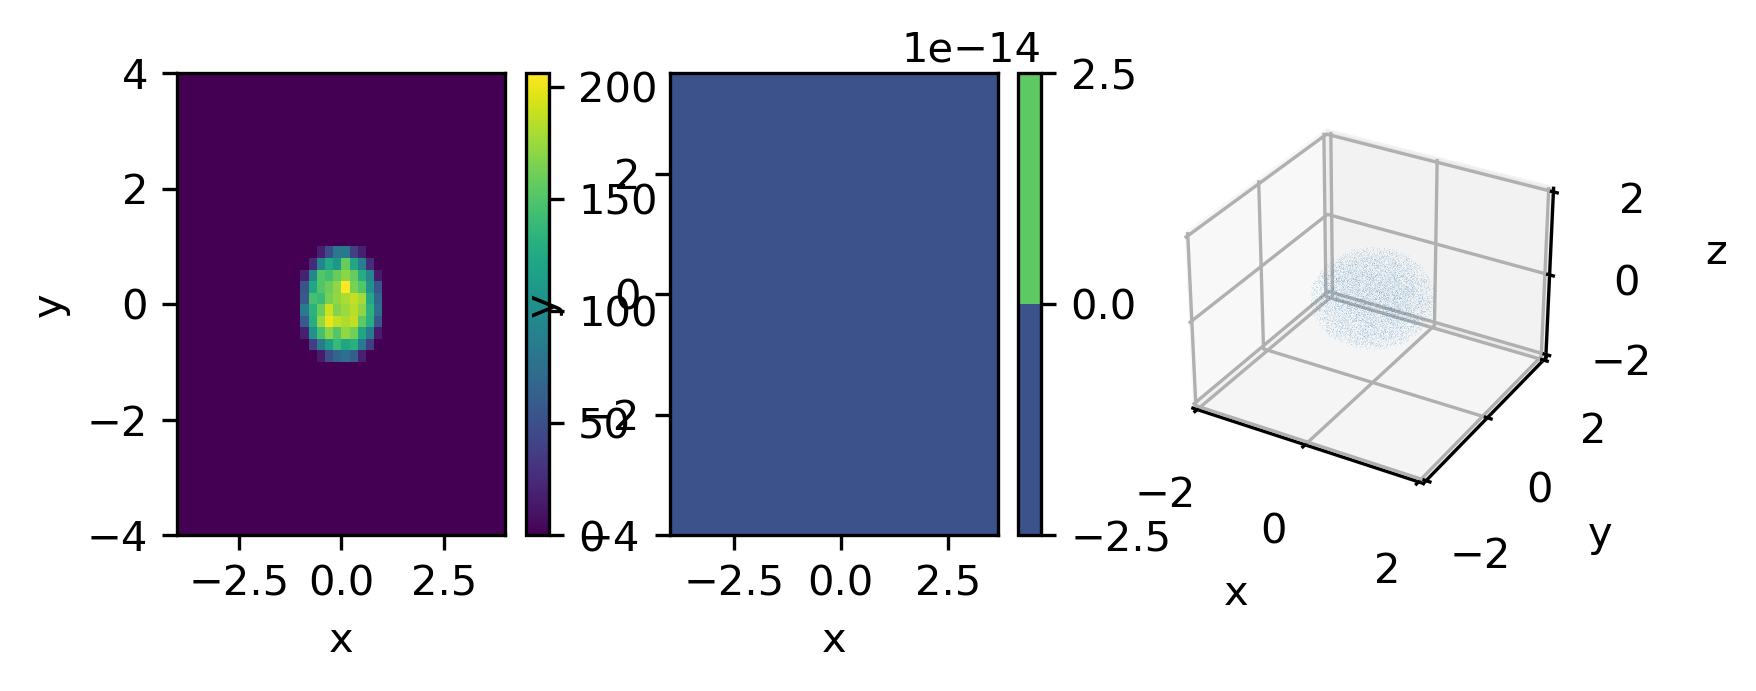

t= 0.00e+00, step 0.6336898803710938 s, total 1.2417914867401123 s; Var 2.01e-01; E(intC) nan


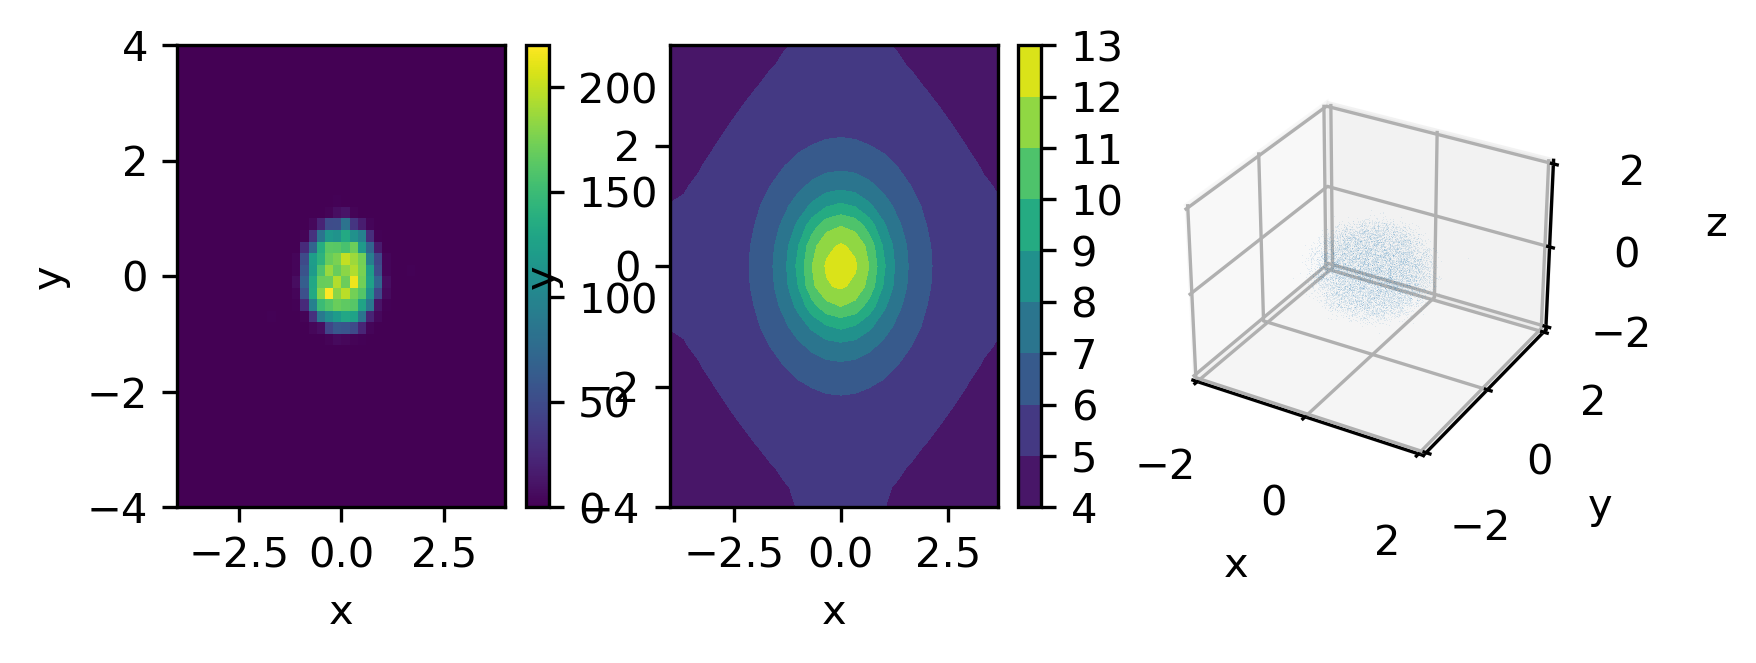

t= 4.00e-03, step 14.484298944473267 s, total 16.042845726013184 s; Var 1.99e-01; E(intC) -4.05e-03


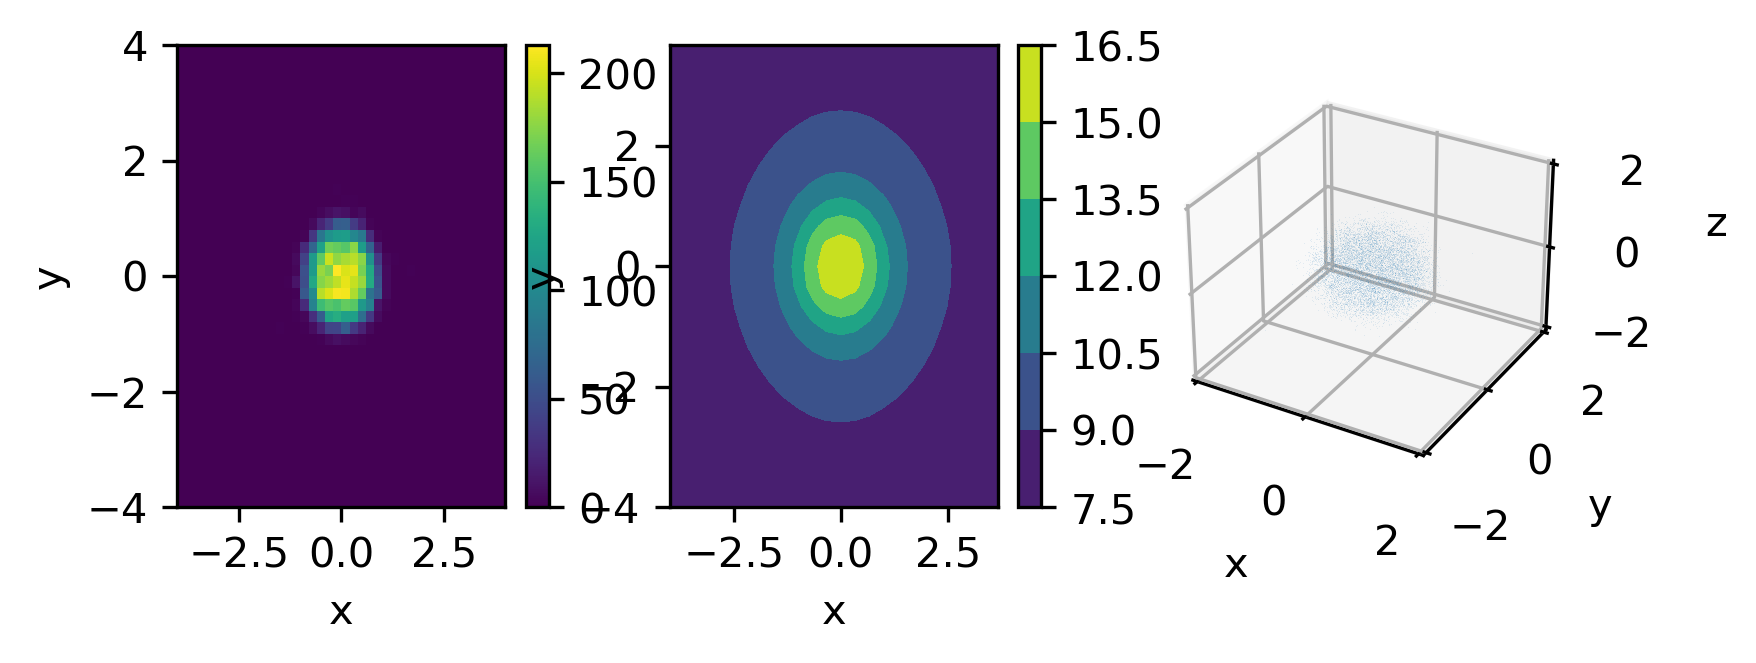

t= 8.00e-03, step 11.463631391525269 s, total 27.509784698486328 s; Var 1.96e-01; E(intC) -3.25e-03


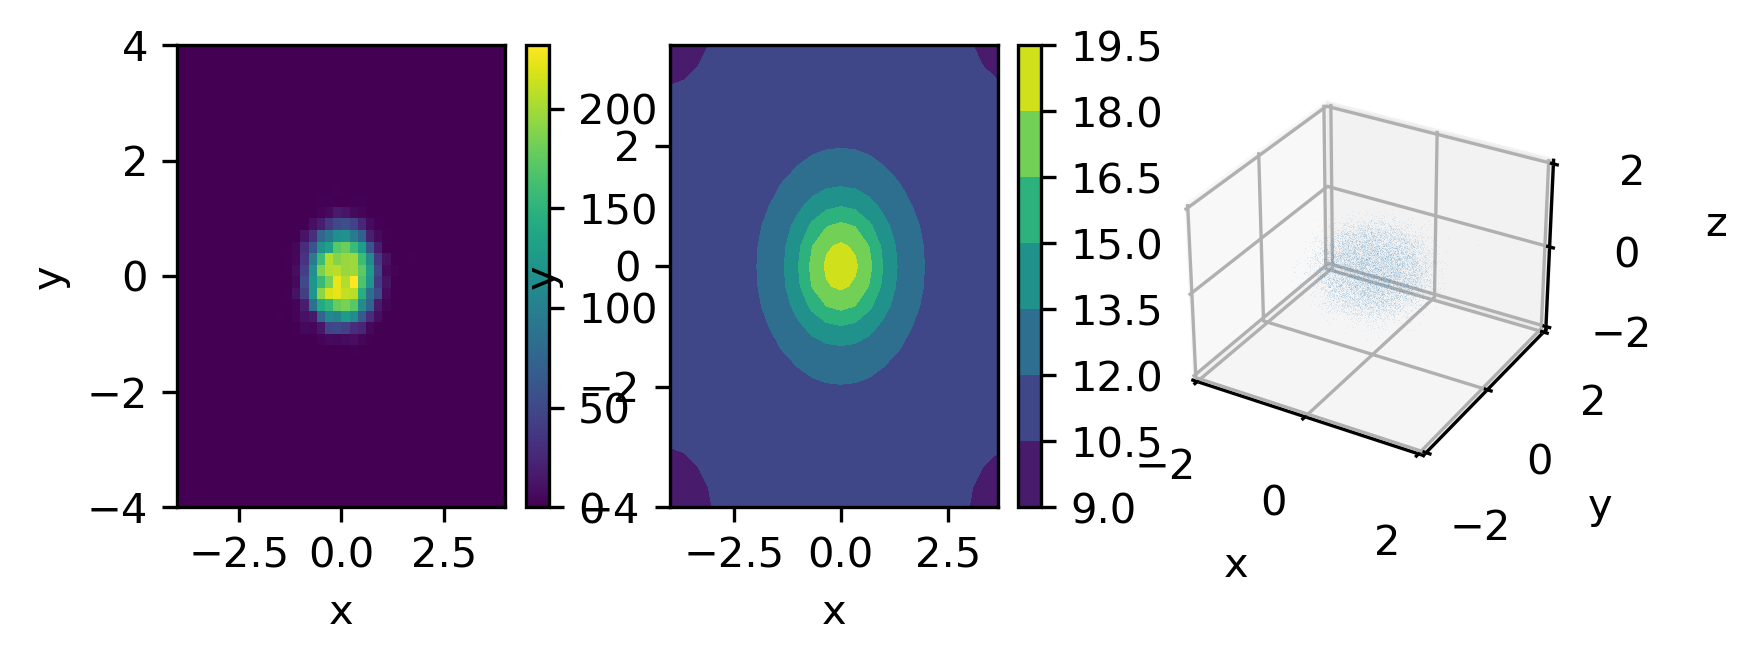

t= 1.20e-02, step 11.534643411636353 s, total 39.04777765274048 s; Var 1.94e-01; E(intC) -2.58e-03


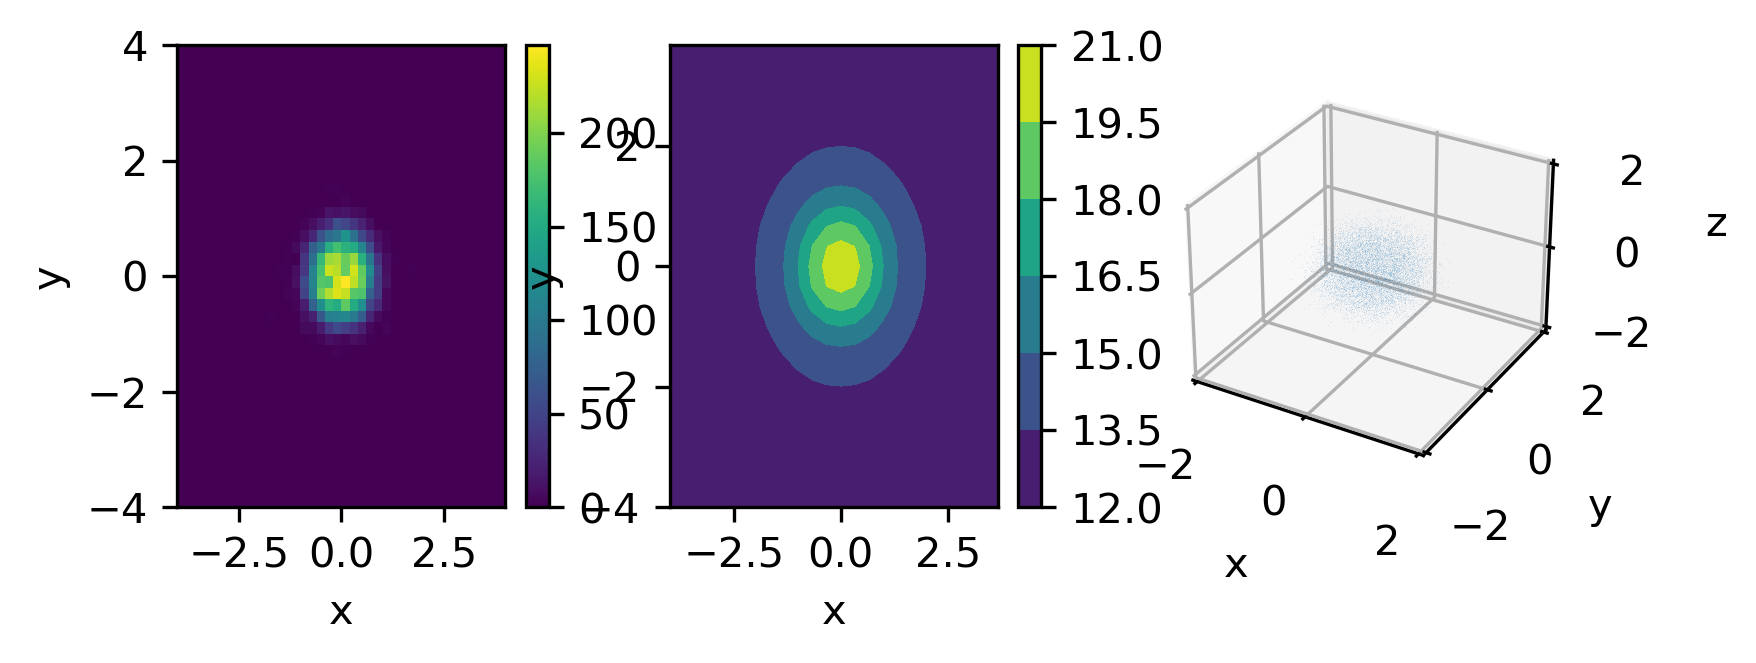

t= 1.60e-02, step 11.568276643753052 s, total 50.61957144737244 s; Var 1.92e-01; E(intC) -2.03e-03


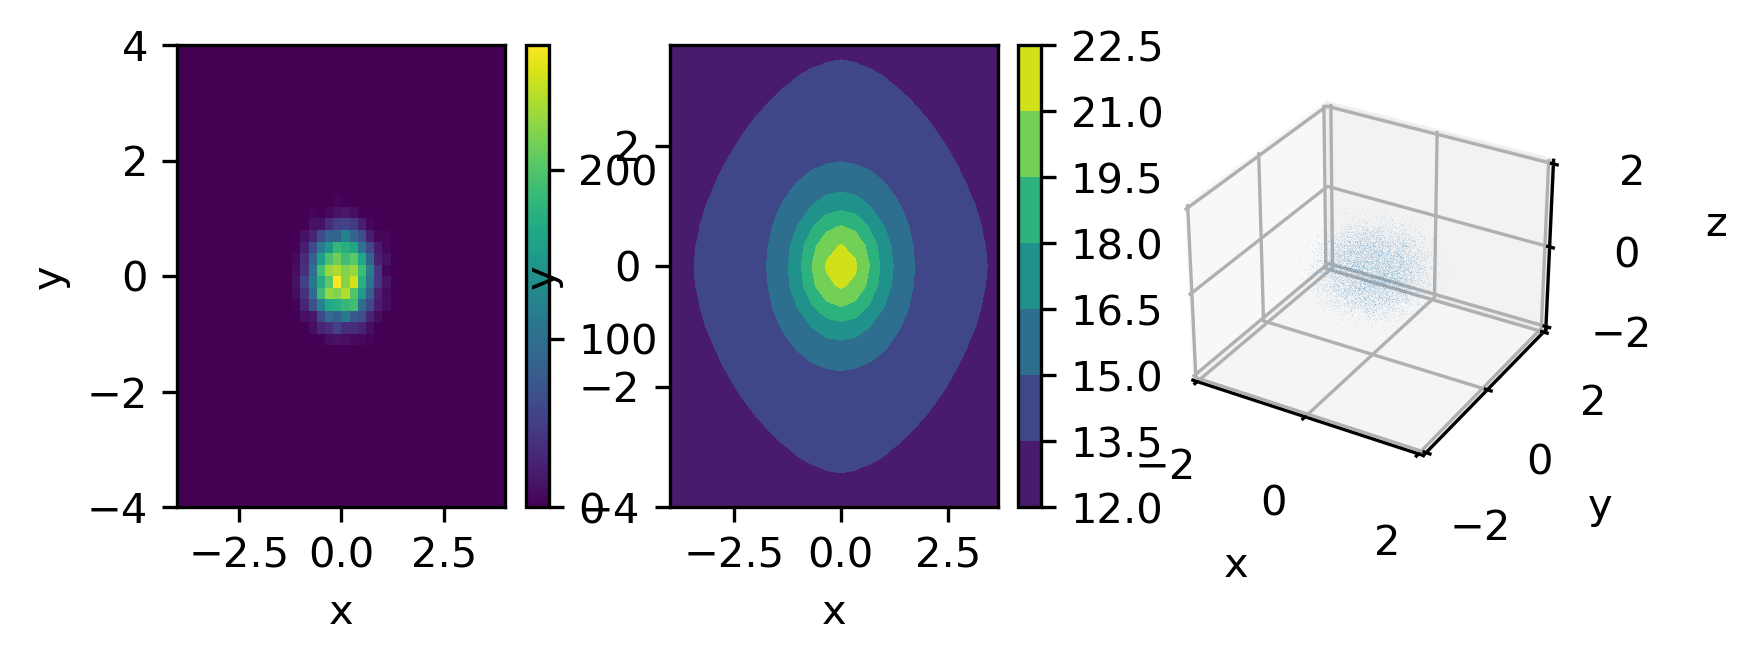

dt= 1.00e-04, t= 2.00e-02, total 62.23066782951355 s; Var 1.89e-01;  E(intC) -1.57e-03; Cmax 2.17e+01


In [4]:
def Vfunc(X):
    Vx=jnp.zeros((3))
    return Vx
model=TDKS(L=8,rng_key=rng_key,eps=eps,H=24)
model.Vfunc=Vfunc
model.M0=ModelM0
model.X=iniX
model.solve(t=T,dt=dt,show_num=5,show_flag=True,single_plot=False)

In [7]:
c,r,rho=FDM_KS(ModelM0, N= 5000,eps=model.eps,k=model.k,mu=model.mu,chi=model.chi,T=T,dt=1e-5,R=20)[2:]
rX=np.sqrt(np.sum(model.X**2,axis=1))


(0.0, 2.4568989276885986)

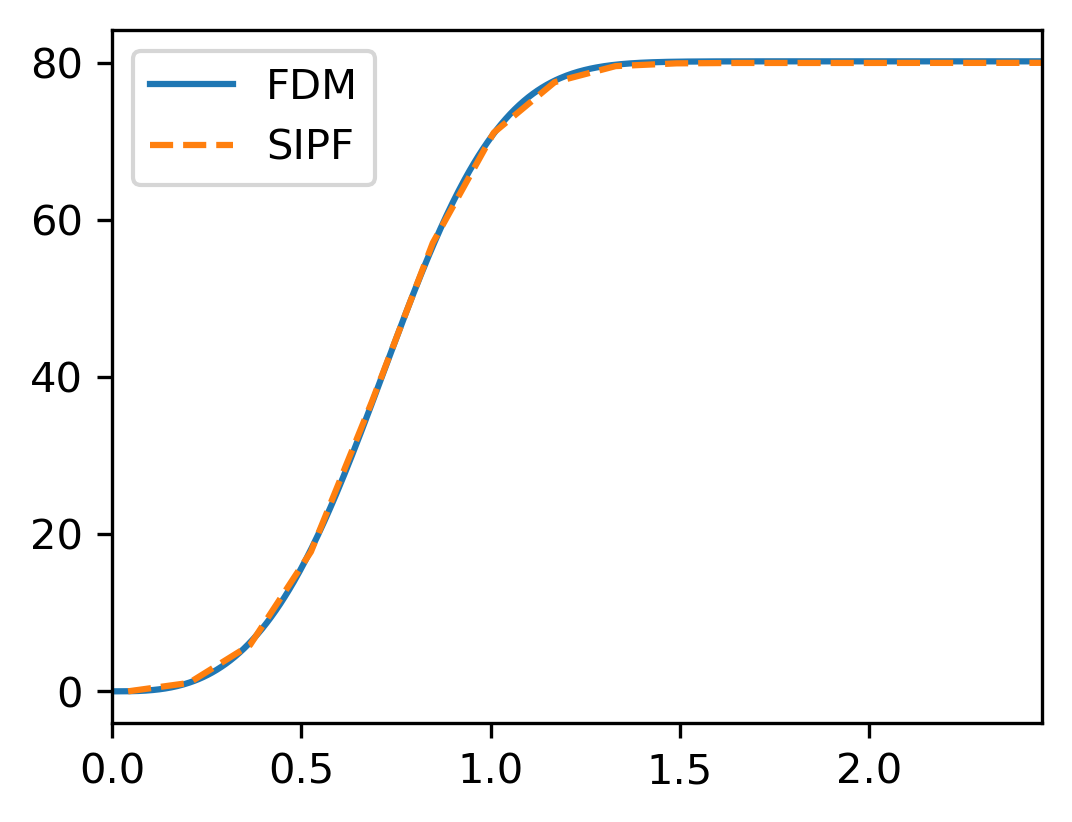

In [10]:
'''Cumlative'''
maxrplt=3
dr=r[1]-r[0]
h1,bins=np.histogram(rX,bins=15)
h1=h1/(0.0+model.J)
Frho_model=np.concatenate(([0],np.cumsum(h1)*model.M0))
f=plt.figure(figsize=(4,3))
ax=plt.subplot(111)
ax.plot(r[r<maxrplt],np.cumsum(4*np.pi*rho[r<maxrplt]*r[r<maxrplt]**2*dr),label='FDM')
ax.plot(bins,Frho_model,'--',label='SIPF')
ax.legend()
plt.xlim([0,bins.max()])